# Estructurando proyecto DS
## Actividad 3 y Actividad 4  
### Actividad 3
    1. Generar preguntas de interés o hipótesis de interés sobre el dataset elegido para el proyecto final.
    2. Crear visualizaciones (univariados, bivariados o trivariados) junto con resúmenes numéricos básicos acordes con los tipos de variables disponibles.
    3. Interpretar los resultados obtenidos
### Actividad 4
    1. Abstracto con motivación y audiencia
    2. Preguntas/Hipótesis que queremos resolver mediante el análisis de datos
    3. Análisis Exploratorio de Datos (EDA)
    4. Con base en las visualizaciones y resúmenes numéricos generados del desafío anterior dar recomendaciones basados en los insights observados.
    5. Para esta oportunidad se deberán tener avances en los apartados: Definición de objetivo, Contexto comercial, Problema Comercial, Contexto analítico, Exploración de datos (EDA)

# Desarrollo

## Definición de Objetivo 
El análisis exploratorio de datos es necesario para cualquier proceso de análisis de datos a la hora de leer e interpretar la información entregada. Resulta imperativo no solo saber distribuir los datos, sino interpretarlos creando relaciones entre sí que a simple vista no es posible visualizar, esto expande la información que puede ser extraída y permite un campo de trabajo con los datos más extenso del esperado. Se va a presentar un caso de caracter práctica con el fin de demostrar el alcance de una adecuada exploración de datos para tomar las mejores decisiones de acuerdo a un banco de datos en bruto. Se explorará un caso imaginario basado en datos reales suministrados por internet y usando tecnologías asociadas a la estadística en el entorno de trabajo ofrecido por Python.

## Contexto Comercial
Usted se encuentra trabajando en el departamento de marketing, en el equipo de analistas, de una empresa que ofrece como actividad comercial principal una plataforma para la visualización de anime. Debido a una disminución de tráfico en la plataforma, los directivos han decidido contratar especialistas para solventar esta crisis. Recientemente, el departamento de diseño ha decidido hacer una reconstrucción visual completa para atraer a las nuevas generaciones y el nuevo jefe del departamento le ha pedido al departamento de marketing un análisis detallado del contenido de la plataforma y su relación con el usuario final. 
El jefe solicitó la viabilidad a partir del puntaje de cada anime lo siguiente: 
- Colocar en la primera linea una exposición por género, productor y estudio. 
- Colocar en la segunda linea lo más atrayente para el usuario final basado en duración, fuente, tipo y compromiso para llegar al final.

## Problema Comercial
Su tarea principal es explorar los datos, identificar la mejor relación entre el score final y las variables de género, productor, estudio, duración, fuente, tipo y compromiso para llegar al final, para luego presentar la mejor propuesta para la exposición de dichas categorías en la primera y segunda linea de la plataforma.

## Contexto Analítico 
Usando un conjunto de datos relativamente reciente, te dispones a iniciar el proceso de análisis. Debido a que recibiste ordenes directas del jefe de departamento, te encuentras limitado a solo lo que solicitó. Tu jefe directo te pide que seas lo más profesional posible y hagas un análisis serio, lo que te da cierta libertad. 

El conjunto de datos a trabajar contiene datos estructurados muy generales. Te dispones a realizarlo de la siguiente manera:  
  
Para la primera linea.  
Se va a sacar el promedio de puntaje por variable categórica. Se va a tomar el score del anime y se va a aplicar como valor para cada variable categórica que contenga dicho ánime. Una vez hecho esto, se va a analizar el comportamiento que tiene el puntaje en relación a la variable categórica asociada.   
Esto se va a realizar de la misma forma para género (genre), productores (producers) y estudios (studios).  
  
Para la segunda linea.   
Para interpretar correctamente la relación de duración, se va a evaluar la relación que existe entre:  
- Duración vs Puntaje  
- Episodios vs Puntaje  
  
Para interpretar correctamente la relación de compromiso para finalizar, se va a evaluar la relación que existe entre:   
- Duración vs Detenido   
- Duración vs Abandonado   
- Episodios vs Detenido   
- Episodios vs Abandonado   
- Duración vs Completado   
- Episodios vs Completado  

## Exploración de Datos

In [73]:
#Inicialización
import os
import sys
import warnings
import pandas as pd
import matplotlib as m
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import plotly as pl

#Lectura del archivo y confirmación de contenido

tabla=pd.read_csv('anime.csv',sep=',',encoding='utf-8')
tabla.head(5)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


### Primera linea

Proceso a seguir:
- Tomar el score del anime y se va a aplicar como valor para cada variable categórica que contenga dicho ánime.  
- Analizar el comportamiento de la calificación según la variable categórica específica.   

Esto se va a realizar de la misma forma para género (genre), productores (producers) y estudios (studios). Se escogerá el que mayor score contenga.

In [74]:
#Extrayendo las columnas que nos interesan
tablaPrimeraLinea = tabla[['Score','Genres','Producers','Studios']].copy()
tablaPrimeraLinea

,Score,Genres,Producers,Studios
0,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Bandai Visual,Sunrise
1,8.39,"Action, Drama, Mystery, Sci-Fi, Space","Sunrise, Bandai Visual",Bones
2,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Victor Entertainment,Madhouse
3,7.27,"Action, Mystery, Police, Supernatural, Drama, ...","TV Tokyo, Bandai Visual, Dentsu, Victor Entert...",Sunrise
4,6.98,"Adventure, Fantasy, Shounen, Supernatural","TV Tokyo, Dentsu",Toei Animation
...,...,...,...,...
17557,Unknown,"Adventure, Mystery, Supernatural",Unknown,Unknown
17558,Unknown,"Comedy, Horror, Supernatural",Kadokawa,Passione
17559,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Unknown,Unknown
17560,Unknown,"Adventure, Slice of Life, Comedy",Kadokawa,8bit


In [75]:
warnings.filterwarnings("ignore")
#Limpieza de datos
#Se trabajará con dataframe para almacenar los datos de interés para las tres categorías
genredf = pd.DataFrame(columns=['Genre', 'Score'])
producerdf = pd.DataFrame(columns=['Producer', 'Score'])
studiodf = pd.DataFrame(columns=['Studio', 'Score'])

#Para cada uno de los registros
for i in range(len(tablaPrimeraLinea)):
#for i in range(10):
    #Temporales para mejor compresion
    studioI=tablaPrimeraLinea['Studios'][i] #Estudios del registro
    generoI=tablaPrimeraLinea['Genres'][i] #Generos del registro
    productorI = tablaPrimeraLinea['Producers'][i] #Productores del registro
    scoreI=tablaPrimeraLinea['Score'][i] #Score del registro
    
    #Productores
    #Deconstruimos si es necesario entre los que se encuentren
    prodTemp = productorI.split(",")
    for j in range(len(prodTemp)): prodTemp[j]=prodTemp[j].strip() #Se eliminan vacios

    for prod in prodTemp: #Por cada productor del registro
        if scoreI != 'Unknown' and prod != 'Unknown': #Si hay desconocidos o vacios, los descartamos porque no podemos trabajar con esa información. 
            producerdf = pd.concat([producerdf, pd.DataFrame([{'Producer' : prod , 'Score' : float(scoreI)}])], ignore_index=True)

    #Genero
    #Deconstruimos si es necesario entre los que se encuentren
    genTemp = generoI.split(",")
    for j in range(len(genTemp)): genTemp[j]=genTemp[j].strip() #Se eliminan vacios

    for gen in genTemp: #Por cada productor del registro
        if scoreI != 'Unknown' and gen != 'Unknown': #Si hay desconocidos o vacios, los descartamos porque no podemos trabajar con esa información. 
            genredf = pd.concat([genredf, pd.DataFrame([{'Genre' : gen , 'Score' : float(scoreI)}])], ignore_index=True)

    #Estudios
    #Deconstruimos si es necesario entre los que se encuentren
    stuTemp = studioI.split(",")
    for j in range(len(stuTemp)): stuTemp[j]=stuTemp[j].strip() #Se eliminan vacios

    for stu in stuTemp: #Por cada productor del registro
        if scoreI != 'Unknown' and stu != 'Unknown': #Si hay desconocidos o vacios, los descartamos porque no podemos trabajar con esa información. 
            studiodf = pd.concat([studiodf, pd.DataFrame([{'Studio' : stu , 'Score' : float(scoreI)}])], ignore_index=True)

Se hizo una limpieza de datos donde se despreciaron los datos desconocidos ya que no será posible trabajar con ellos.  
Una vez hecha la limpieza y adecuación de dataframe, vamos a visualizar la información. 

#### Productores

In [76]:
len(producerdf['Producer'].unique())

1208

Hay 1208 productores.  
No será posible hacer una comparativa de todos, así que solo se va a hacer una comparativa de aquellos 30 con mayores puntajes para tomar una decisión. 

<Axes: xlabel='Producer'>

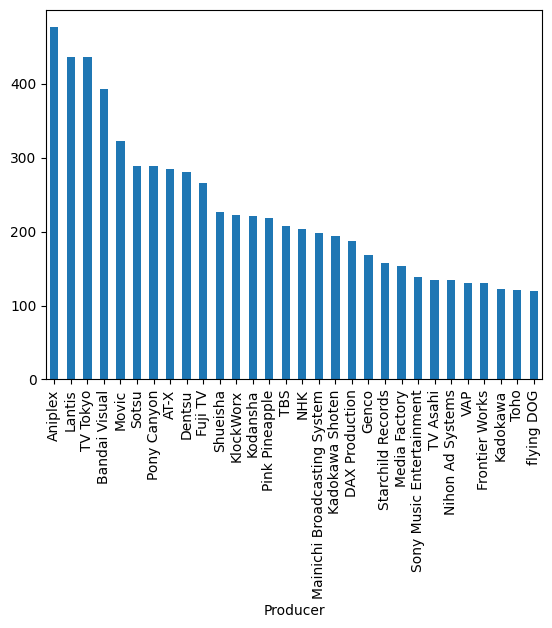

In [77]:
producerdf["Producer"].value_counts()[0:30].plot(kind='bar')

En relación a los productores, se puede visualizar a primera vista que hay una inclinación marcada a los primeros 5 productores y luego los siguientes 5. No hay tanta variabilidad. A simple vista, se podría decir que colocar a los 5 productores mejor calificados sería adecuado para captar la atención, pero esto también podría generar que muchos usuarios descarten la primera linea por ver a productores tan conocidos sin tener en cuenta otros detalles.  
No es concluyente. 


#### Géneros


In [78]:
len(genredf['Genre'].unique())

43

Hay 43 productores.  
No será posible hacer una comparativa de todos, así que solo se va a hacer una comparativa de aquellos 30 con mayores puntajes para tomar una decisión. 

<Axes: xlabel='Genre'>

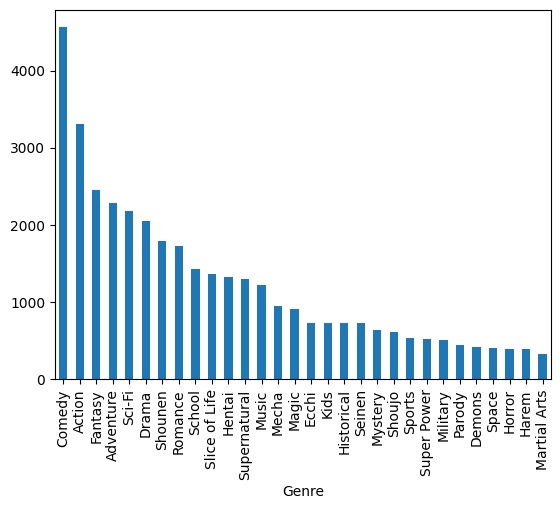

In [79]:
genredf["Genre"].value_counts()[0:30].plot(kind='bar')

En relación a los géneros, se puede visualizar una clara inclinación hacia los géneros de comedia (Comedy) y acción (Action). Si se colocan únicamente estos dos géneros en la primera linea, contrario a captar mejor la atención, va a monopolizar la sección y podría llegar a ser menos considerado a la hora de tomar una decisión para ver anime.   
Lo más adecuado sería tomar los animes con mejores calificaciones que hagan parte de los siguientes 10 géneros mejor calificados, pero que incluyan los géneros de comedia (Comedy) y acción (Action) entre sus subgéneros. Sin embargo, no hay forma de asegurar la viabilidad de esto. 

#### Estudios

In [80]:
len(studiodf['Studio'].unique())

624

Hay 624 estudios.  
No será posible hacer una comparativa de todos, así que solo se va a hacer una comparativa de aquellos 30 con mayores puntajes para tomar una decisión. 

<Axes: xlabel='Studio'>

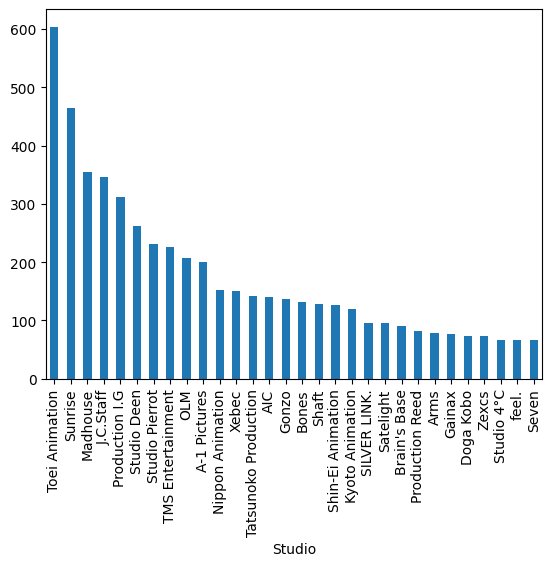

In [81]:
studiodf["Studio"].value_counts()[0:30].plot(kind='bar')

En relación a los estudios, tiene un comportamiento similar al de los géneros. De la misma forma, ver el mismo estudio podría desmotivar al usuario de escoger un anime a ver. Es probable que el usuario ya conozca de antemano el estudio y sus productos, lo que dificultaría su labor de encontrar algo distinto que ver. Sin embargo, no hay información que respalde esta teoria. 


**Conclusión:** Ha sido posible visualizar aquello que es más agradable para una mejor calificación en cuanto a estudios, productores y estudios, pero son datos superficiales. La conclusión a la que podemos llegar es que no es posible tomar una decisión a partir de la información presentada aquí, se necesita mayor detalle en cuanto al comportamiento de los usuarios más allá de los puntajes. 

### Segunda Linea

Para interpretar correctamente la relación de duración, se va a evaluar la relación que existe entre:  
- Duración vs Puntaje  
- Episodios vs Puntaje  
  
Para interpretar correctamente la relación de compromiso para finalizar, se va a evaluar la relación que existe entre:   
- Duración vs Detenido  
- Duración vs Abandonado   
- Episodios vs Detenido  
- Episodios vs Abandonado  
- Duración vs Completado  
- Episodios vs Completado

In [82]:
#Extrayendo las columnas que nos interesan
tablaSegundaLinea = tabla[['Score','Duration','Episodes','On-Hold','Dropped','Completed']].copy()
tablaSegundaLinea

,Score,Duration,Episodes,On-Hold,Dropped,Completed
0,8.78,24 min. per ep.,26,71513,26678,718161
1,8.39,1 hr. 55 min.,1,1935,770,208333
2,8.24,24 min. per ep.,26,25465,13925,343492
3,7.27,25 min. per ep.,26,5121,5378,46165
4,6.98,23 min. per ep.,52,766,1108,7314
...,...,...,...,...,...,...
17557,Unknown,Unknown,Unknown,0,0,0
17558,Unknown,Unknown,Unknown,14,0,0
17559,Unknown,Unknown,Unknown,0,0,0
17560,Unknown,Unknown,Unknown,2,1,2


In [83]:
#Limpieza de datos
#Dataframe con la data limpia
dataSecond= pd.DataFrame(columns=['Score','Duration','Episodes','On-Hold','Dropped','Completed'])

for i in range(len(tablaSegundaLinea)): #Por cada registro
#for i in range(10):
    if tablaSegundaLinea['Duration'][i] != 'Unknown' and tablaSegundaLinea['Score'][i] != 'Unknown' and tablaSegundaLinea['Episodes'][i] != 'Unknown': #Si hay desconocidos o vacios, los descartamos porque no podemos trabajar con esa información. 
        dur = tablaSegundaLinea['Duration'][i].split(" ") #Se toma la duración de la fila
        duration = 0 #Variable para colocar la duración en minutos
        #Hay varios casos aquí: 
        #1 Cuando es en segundos "x sec."
        #2 Cuando es en segundos por episodios "x sec. per ep."
        #3 Cuando es en minutos "x min."
        #4 Cuando es en minutos por episodios "x min. per ep."
        #5 Cuando es en horas "x hr."
        #6 Cuando es en horas y minutos "x hr. x min."

        if dur[1] == "sec.": #Si es por segundos
            duration = float(dur[0]) / 60 #Se divide el valor en 60 para volverlo minutos. 
            #Queda validado caso 1
        elif dur[1] == "min.": #Sino, se valida si es por minutos
            duration = float(dur[0]) #Se deja el valor en minutos
            #Queda validado caso 3
        else: #Sino, es por horas
            duration = float(dur[0]) * 60 #Se multiplica el valor por 60 para volverlo minutos
            #Queda validado caso 5

        if len(dur) > 2: #Si el tamaño es mayor a 2, es porque es una duración compuesta
            if dur[-1] == "ep.": #Si se divide por episodios, se validan casos 2 y 4
                duration = duration * float(tablaSegundaLinea['Episodes'][i]) #Se multiplica por la cantidad de episodios
                #Quedan validados casos 2 y 4
            elif dur[-1] == "min.": #Si se divide en horas y minutos, se valida caso 6
                duration = duration + float(dur[2]) #Se suman los minutos
        #Se agrega al datadrame        
        dataSecond = pd.concat([dataSecond, pd.DataFrame([{'Score':float(tablaSegundaLinea['Score'][i]),'Duration':duration,
                                                       'Episodes':int(tablaSegundaLinea['Episodes'][i]),'On-Hold':int(tablaSegundaLinea['On-Hold'][i]),
                                                       'Dropped':int(tablaSegundaLinea['Dropped'][i]),'Completed':int(tablaSegundaLinea['Completed'][i])}])], ignore_index=True)



In [84]:
dataSecond

,Score,Duration,Episodes,On-Hold,Dropped,Completed
0,8.78,624.0,26,71513,26678,718161
1,8.39,115.0,1,1935,770,208333
2,8.24,624.0,26,25465,13925,343492
3,7.27,650.0,26,5121,5378,46165
4,6.98,1196.0,52,766,1108,7314
...,...,...,...,...,...,...
12291,6.41,1.0,1,5,1,390
12292,7.52,4.0,1,8,1,549
12293,6.83,10.0,1,18,2,168
12294,4.81,23.0,1,119,202,8196


In [85]:
#Dataframe para graficar según la duración
dataDuration = dataSecond.sort_values(by = 'Duration').copy()
dataDuration

,Score,Duration,Episodes,On-Hold,Dropped,Completed
9508,5.48,0.050000,1,14,38,4609
9187,2.61,0.116667,1,9,55,2690
9004,3.24,0.166667,1,4,24,1073
9183,4.85,0.200000,1,3,21,523
11392,5.19,0.200000,1,0,14,183
...,...,...,...,...,...,...
3075,7.76,9325.000000,373,999,1070,4609
1568,8.16,11500.000000,500,109707,124253,865643
5561,6.08,16698.000000,726,23,108,230
2253,7.70,19657.000000,1787,3622,6353,21246


In [86]:
#Dataframe para graficar según la cantidad de episodios
dataEpisodes = dataSecond.sort_values(by = 'Episodes', ignore_index=True).copy()
dataEpisodes

,Score,Duration,Episodes,On-Hold,Dropped,Completed
0,6.52,23.0,1,57,45,7207
1,6.92,86.0,1,186,170,7629
2,4.50,3.0,1,7,46,353
3,5.73,6.0,1,8,28,198
4,5.28,38.0,1,55,94,601
...,...,...,...,...,...,...
12291,5.80,7140.0,1428,12,77,311
12292,6.00,36775.0,1471,67,146,423
12293,5.82,7825.0,1565,14,70,263
12294,7.70,19657.0,1787,3622,6353,21246


Ahora vamos a darle un vistazo a las relaciones entre las distintas variables. 

#### Relación de duración


In [87]:
# Creamos la figura y añadimos un trazado de dispersión.
fig = go.Figure()
fig.add_trace(go.Scatter(x=dataDuration['Duration'], y=dataDuration['Score'], mode='markers'))

# Personalizamos el diseño del gráfico.
fig.update_layout(title='Duración vs Puntaje')

# Mostramos el gráfico interactivo.
fig.show()

Con respecto a la relación de duración y puntaje, no es posible observar una relación decisiva. Aparentemente, hay mayor interés en los animes con poca duración.  
Se necesita más detalle. 

In [88]:
# Creamos la figura y añadimos un trazado de dispersión.
fig = go.Figure()
fig.add_trace(go.Scatter(x=dataEpisodes['Episodes'], y=dataEpisodes['Score'], mode='markers'))

# Personalizamos el diseño del gráfico.
fig.update_layout(title='Episodios vs Puntaje')

# Mostramos el gráfico interactivo.
fig.show()

Con respecto a la relación de la cantidad de episodios y puntaje, no es posible observar una relación decisiva. Se repite el mismo comportamiento anterior.  
Se necesita más detalle. 

En ambos casos se mostró una tendencia hacia los animes de menor duración, pero resulta necesario mayor certeza. No es posible llegar a una conclusión solo con esta información. 

#### Relación de compromiso

In [89]:
# Creamos la figura y añadimos un trazado de dispersión.
fig = go.Figure()
fig.add_trace(go.Scatter(x=dataDuration['Duration'], y=dataDuration['On-Hold'], mode='markers'))

# Personalizamos el diseño del gráfico.
fig.update_layout(title='Duración vs Detenido')

# Mostramos el gráfico interactivo.
fig.show()

Con respecto a la relación de duración y detenido, no es posible observar una relación decisiva. Se puede observar una tendencia a detener los animes alrededor de cierto rango de duración, pero es inconcluso.  
Se necesita más detalle. 

In [90]:
# Creamos la figura y añadimos un trazado de dispersión.
fig = go.Figure()
fig.add_trace(go.Scatter(x=dataDuration['Duration'], y=dataDuration['Dropped'], mode='markers'))

# Personalizamos el diseño del gráfico.
fig.update_layout(title='Duración vs Abandonado')

# Mostramos el gráfico interactivo.
fig.show()

Con respecto a la relación de duración y abandono, no es posible observar una relación decisiva. Es posible observar que existe una tendencia alrededor de cierto rango de duración al ser abandonado. Es posible que esto se deba a la tolerancia del usuario para esperar un contenido interesante antes de cierto tiempo. Esta información puede ser constructiva más adelante.  
Se necesita más detalle. 

In [91]:
# Creamos la figura y añadimos un trazado de dispersión.
fig = go.Figure()
fig.add_trace(go.Scatter(x=dataEpisodes['Episodes'], y=dataEpisodes['On-Hold'], mode='markers'))

# Personalizamos el diseño del gráfico.
fig.update_layout(title='Episodios vs Detenido')

# Mostramos el gráfico interactivo.
fig.show()

Con respecto a la relación de la cantidad de episodios y detenido, no es posible observar una relación decisiva. La misma tendencia anterior se puede observar aquí.    
Se necesita más detalle. 

In [92]:
# Creamos la figura y añadimos un trazado de dispersión.
fig = go.Figure()
fig.add_trace(go.Scatter(x=dataEpisodes['Episodes'], y=dataEpisodes['Dropped'], mode='markers'))

# Personalizamos el diseño del gráfico.
fig.update_layout(title='Episodios vs Abandonado')

# Mostramos el gráfico interactivo.
fig.show()

Con respecto a la relación de la cantidad de episodios y abandono, no es posible observar una relación decisiva. Se puede observar el mismo comportamiento visto anteriormente.   
Se necesita más detalle. 

In [93]:
# Creamos la figura y añadimos un trazado de dispersión.
fig = go.Figure()
fig.add_trace(go.Scatter(x=dataDuration['Duration'], y=dataDuration['Completed'], mode='markers'))

# Personalizamos el diseño del gráfico.
fig.update_layout(title='Duración vs Completado')

# Mostramos el gráfico interactivo.
fig.show()

Con respecto a la relación de duración y completado, no es posible observar una relación decisiva. Si bien muestra una tendencia similar a las vistas anteriormente, aquí se puede ver que hay una fuerte tendencia a completar aquellos animes de menor duración. También se encuentran rangos de apreciación muy similares a los rangos de depreciación vistos en gráficas anteriores. Este comportamiento es contradictorio.    
Se necesita más detalle. 

In [94]:
# Creamos la figura y añadimos un trazado de dispersión.
fig = go.Figure()
fig.add_trace(go.Scatter(x=dataEpisodes['Episodes'], y=dataEpisodes['Completed'], mode='markers'))

# Personalizamos el diseño del gráfico.
fig.update_layout(title='Episodios vs Completado')

# Mostramos el gráfico interactivo.
fig.show()

Con respecto a la relación de la cantidad de episodios y completado, no es posible observar una relación decisiva. Al igual que la gráfica anterior, se encuentra un comportamiento similar que resulta contradictorio con lo revisado. Hace falta mayor estudio del caso para llegar a una conclusión.    
Se necesita más detalle. 

**Conclusión:**   
Con respecto a la primera linea, se necesita mayor exploración para tomar una decisión sobre cuál sería la categoría más adecuada para mostrar en la plataforma. Es necesario tomar en cuentas más variables y tal vez establecer un modelo.   
Con respecto a la segunda linea, Ha sido posible observar un comportamiento similar en las gráficas presentadas, demostrando una tendencia tanto a la depreciación (ya sea abandono o detención) como de apreciación (de completitud) en rangos específicos de duración y cantidad de episodios. Es posible observar que el usuario tiene cierta tolerancia hasta cierta duración y cantidad de episodios en un rango específico para decidir si continua viendo un anime o lo abandona, siendo que lo completa si está dentro del rango. Si se tiene en cuenta que el rango es congruente en ambos casos, es posible concluir que aquellos son rangos de mayor interés para recomendar animes en la plataforma. 